In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode

In [3]:
df = pd.read_excel('/home/ishant/Desktop/DedectChurn/Dataset/customer_churn_large_dataset.xlsx')

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [26]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [27]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [28]:
df.drop(['CustomerID',	'Name'] , axis=1 , inplace=True)

In [29]:
df_65 = df[df['Age']>=65]

In [30]:
df_65[df_65.Churn ==0 ].sort_values("Monthly_Bill" ,ascending=True).head(30)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
94645,68,Male,Miami,4,30.02,116,0
97375,70,Male,Los Angeles,2,30.04,483,0
27540,65,Female,New York,7,30.05,417,0
96094,65,Female,New York,16,30.08,293,0
57862,66,Male,New York,17,30.09,248,0
35932,65,Female,New York,8,30.10,120,0
46001,65,Male,Los Angeles,11,30.11,361,0
30814,66,Female,New York,22,30.12,235,0
67570,65,Male,New York,15,30.12,352,0
70739,65,Female,Houston,16,30.15,103,0


In [31]:
df_65[df_65.Churn ==1 ].sort_values("Monthly_Bill" ,ascending=True).head(30)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
21553,67,Female,New York,16,30.01,390,1
46353,65,Female,Miami,10,30.02,403,1
12868,68,Female,Houston,18,30.03,306,1
8026,68,Female,Miami,24,30.03,172,1
68923,69,Male,New York,2,30.04,59,1
47650,65,Male,Los Angeles,13,30.05,421,1
18054,70,Male,Houston,20,30.05,106,1
93362,66,Female,Houston,5,30.06,82,1
22961,69,Female,Miami,1,30.10,216,1
57598,67,Male,Houston,11,30.10,399,1


In [32]:
df_65.to_csv("65+.csv")

In [33]:
df.shape

(100000, 7)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(100000, 7)

In [36]:
city = df.Location.unique()

In [37]:
print(city)

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [38]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [39]:
df['Gender'].replace({"Male":1 , "Female":0} , inplace=True)

In [40]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


In [41]:
df["Total_Spend"] = df.Subscription_Length_Months*df.Monthly_Bill

In [42]:
df['Value'] = round(df.Total_Usage_GB/df.Monthly_Bill)

In [43]:
df["Senior_Citizen"] = df["Age"].apply(lambda x: 1 if x > 60 else 0)

In [44]:
df['Loyal_Customer'] = df['Subscription_Length_Months'].apply(lambda x: 1 if x > 20 else 0)

In [45]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Value,Senior_Citizen,Loyal_Customer
0,63,1,Los Angeles,17,73.36,236,0,1247.12,3.0,1,0
1,62,0,New York,1,48.76,172,0,48.76,4.0,1,0
2,24,0,Los Angeles,5,85.47,460,0,427.35,5.0,0,0
3,36,0,Miami,3,97.94,297,1,293.82,3.0,0,0
4,46,0,Miami,19,58.14,266,0,1104.66,5.0,0,0


In [38]:
df = df.drop_duplicates()

In [42]:
df.shape

(100000, 13)

In [36]:
average_spend_by_churn = df.groupby(['Churn'])['Loyal_Customer'].value_counts()
print(average_spend_by_churn)

Churn  Loyal_Customer
0      0                 41912
       1                  8309
1      0                 41471
       1                  8308
Name: count, dtype: int64


In [37]:
average_spend_by_churn = df.groupby(['Churn','Senior_Citizen'])['Total_Spend'].mean()
print(average_spend_by_churn)

Churn  Senior_Citizen
0      0                 810.882948
       1                 811.903034
1      0                 811.329570
       1                 817.494361
Name: Total_Spend, dtype: float64


In [50]:
average_spend_by_churn = df.groupby(['Churn','Location'])['Senior_Citizen'].value_counts()
print(average_spend_by_churn)

Churn  Location     Senior_Citizen
0      Chicago      0                 8084
                    1                 1929
       Houston      0                 8341
                    1                 1917
       Los Angeles  0                 8324
                    1                 1837
       Miami        0                 8049
                    1                 1906
       New York     0                 7976
                    1                 1858
1      Chicago      0                 8063
                    1                 1882
       Houston      0                 7982
                    1                 1917
       Los Angeles  0                 8071
                    1                 1809
       Miami        0                 8176
                    1                 1900
       New York     0                 8119
                    1                 1860
Name: count, dtype: int64


In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [17]:
average_spend_by_churn = df.groupby(['Churn' , 'Location'])['Total_Spend'].mean()
print(average_spend_by_churn)

Churn  Location   
0      Chicago        810.968418
       Houston        813.362174
       Los Angeles    814.327810
       Miami          806.282279
       New York       810.287609
1      Chicago        809.127416
       Houston        809.817715
       Los Angeles    811.885788
       Miami          821.835324
       New York       809.652711
Name: Total_Spend, dtype: float64


In [18]:
average_spend_by_churn = df.groupby(['Churn' , 'Location'])['Total_Spend'].mean()
print(average_spend_by_churn)

Churn  Location   
0      Chicago        810.968418
       Houston        813.362174
       Los Angeles    814.327810
       Miami          806.282279
       New York       810.287609
1      Chicago        809.127416
       Houston        809.817715
       Los Angeles    811.885788
       Miami          821.835324
       New York       809.652711
Name: Total_Spend, dtype: float64


In [19]:
average_spend_by_churn = df.groupby(['Churn'])['Subscription_Length_Months'].mean()
print(average_spend_by_churn)

Churn
0    12.474045
1    12.506298
Name: Subscription_Length_Months, dtype: float64


In [20]:
average_spend_by_churn = df.groupby(['Churn'])['Value'].value_counts()
print(average_spend_by_churn)

Churn  Value
0      3.0      7320
       2.0      7294
       4.0      7178
       5.0      6847
       1.0      5361
       6.0      4904
       7.0      3318
       8.0      2477
       9.0      1710
       10.0     1281
       11.0      866
       12.0      640
       13.0      448
       14.0      310
       15.0      201
       16.0       64
       17.0        2
1      3.0      7210
       2.0      7170
       4.0      7104
       5.0      6832
       1.0      5429
       6.0      4814
       7.0      3277
       8.0      2367
       9.0      1753
       10.0     1253
       11.0      916
       12.0      673
       13.0      466
       14.0      291
       15.0      161
       16.0       62
       17.0        1
Name: count, dtype: int64


In [49]:
fig = go.Figure(data=[go.Pie(labels=['Not Churn','Churn'], values=df['Churn'].value_counts())])
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Text(0.5, 1.0, 'Correlation Matrix')

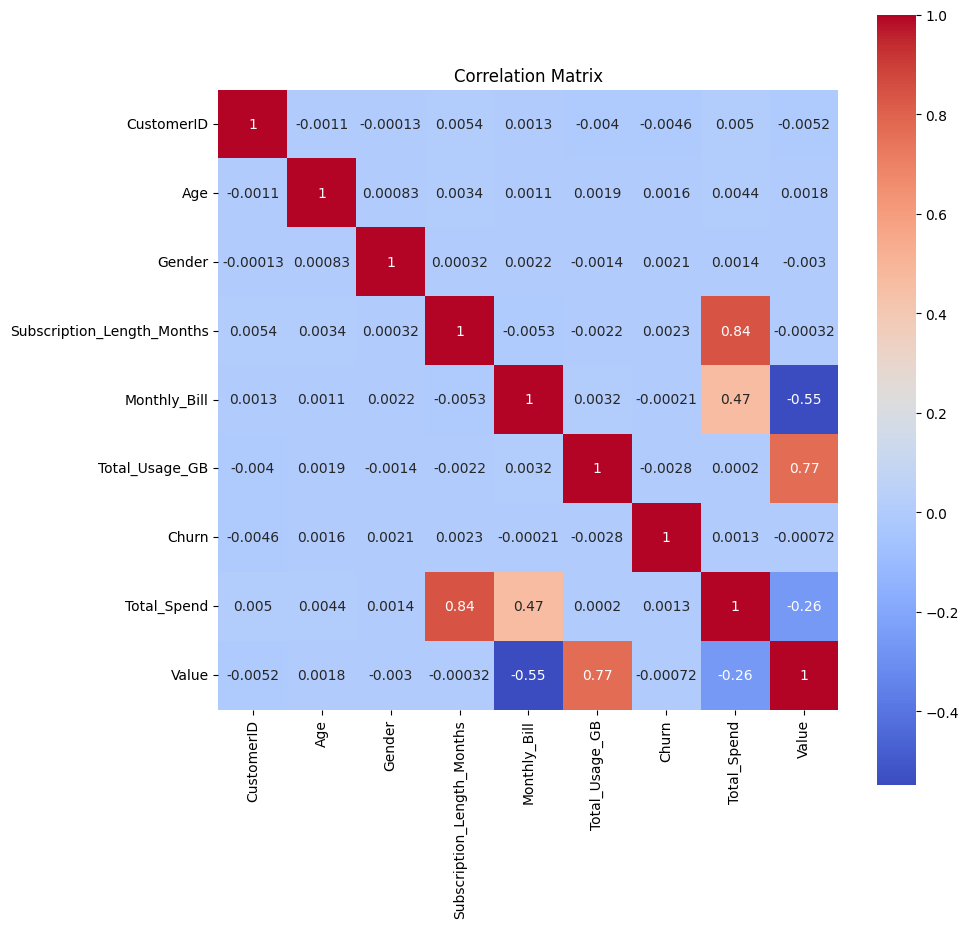

In [94]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [43]:
df2 = df.drop(['CustomerID',	'Name' ] , axis=1)
df2.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Value,Senior_Citizen,Loyal_Customer
0,63,1,Los Angeles,17,73.36,236,0,1247.12,3.0,1,0
1,62,0,New York,1,48.76,172,0,48.76,4.0,1,0
2,24,0,Los Angeles,5,85.47,460,0,427.35,5.0,0,0
3,36,0,Miami,3,97.94,297,1,293.82,3.0,0,0
4,46,0,Miami,19,58.14,266,0,1104.66,5.0,0,0


In [44]:
def prepare_data(data):
    # One-hot encode the 'type' column
    data = pd.concat([data, pd.get_dummies(data['Location']).astype(int)], axis=1)

    data.drop(['Location'], axis=1, inplace=True)
    

    X = data.drop('Churn', axis=1)
    y = data['Churn']
   

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

    # Standardize selected columns
    col_names = ['Age',	'Total_Usage_GB', 'Total_Spend']
    scaler = StandardScaler()
    X_train[col_names] = scaler.fit_transform(X_train[col_names])
    X_test[col_names] = scaler.transform(X_test[col_names])
    

    return X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = prepare_data(df2)

In [98]:
X_train.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Total_Spend,Value,Chicago,Houston,Los Angeles,Miami,New York
58994,-1.700728,0,3,85.96,0.948029,-1.037510,4.630060,0,1,0,0,0
46580,-0.980923,1,15,94.33,1.592621,1.130166,5.109721,0,0,0,0,1
8298,-0.326555,0,20,89.25,0.802228,1.823424,4.246499,0,1,0,0,0
35732,-0.915486,1,16,65.58,-0.295114,0.445113,3.598658,0,0,1,0,0
67670,1.243928,1,8,85.90,-1.507562,-0.233214,0.908033,0,1,0,0,0


In [47]:
custom_names = {
    LogisticRegression(solver='liblinear', random_state=24): 'Custom Logistic Regression',
    DecisionTreeClassifier(random_state=24): 'Custom Decision Tree',
    KNeighborsClassifier(n_neighbors=5): 'Custom KNN',
    RandomForestClassifier(random_state=24): 'Custom Random Forest'
}


cv_models = list(custom_names.keys())

# Iterate through the models and print their test accuracy
for model in cv_models:
    model_name = custom_names[model]
    print("{} Test Accuracy: {}".format(model_name, cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()))

Custom Logistic Regression Test Accuracy: 0.50305
Custom Decision Tree Test Accuracy: 0.498225
Custom KNN Test Accuracy: 0.4995
Custom Random Forest Test Accuracy: 0.498625


In [1]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
# plt.savefig('/kaggle/working/plots/correlation_matrix.png')

NameError: name 'df' is not defined

In [2]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].corr()

NameError: name 'df' is not defined

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.5033